# Sample PRS Calculation

In [34]:
import pandas as pd
import numpy as np

## PLINK Command for Extraction
 plink --bfile 5_Genotype_Data_All_Years --recode A --out maize_results_test --extract maize_trait_selected_filtered_snplist.txt

In [21]:
yield_mat = pd.read_csv('maize_trait_selected_filtered_results.csv', sep = '\t')[['ID', 'BETA']].set_index('ID')
geno_mat = pd.read_csv('maize_results_test.raw', '\t')
geno_mat_filt = geno_mat.drop(columns = ['PAT', 'MAT', 'SEX', 'PHENOTYPE', 'FID']).set_index('IID')
geno_mat_filt = geno_mat_filt.fillna(0)

/misc/appl/python-3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
geno_mat_filt

,S1_201031_C,S1_649777_C,S1_663277_G,S1_679084_A,S1_1003015_G,S1_1727832_A,S1_1833845_C,S1_1883477_G,S1_2011910_C,S1_2023076_G,...,S10_150841878_T,S10_150841928_G,S10_150906424_T,S10_151058559_C,S10_151152523_C,S10_151152954_A,S10_151162623_G,S10_151165894_A,S10_151167032_G,S10_151359936_A
IID,,,,,,,,,,,,,,,,,,,,,
2369/DK3IIH6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2369/PHN82,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2369/PHZ51,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
2FACC/DK3IIH6,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
4N506/DK3IIH6,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z037E0054/LH162,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
Z037E0054/PHZ51,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Z038E0057/DK3IIH6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [27]:
yield_mat

,BETA
ID,
S1_201031,0.680938
S1_649777,-1.076860
S1_663277,-1.075940
S1_679084,-1.126980
S1_1003015,-0.835649
...,...
S10_151152954,-1.113190
S10_151162623,0.705315
S10_151165894,-1.089760


In [17]:
print(yield_mat.shape)
print(geno_mat_filt.shape)

(9742, 1)
(4928, 9742)


In [24]:
np.dot(geno_mat_filt, yield_mat)

array([[ 593.563574],
       [-222.358232],
       [3638.057911],
       ...,
       [ 739.554165],
       [2567.161553],
       [3788.283707]])

<ipython-input-32-c0bfb95c7b10>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  np.matmul(geno_mat_filt, yield_mat).hist()


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

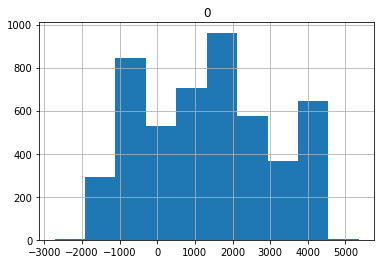

In [32]:
np.matmul(geno_mat_filt, yield_mat).hist()

In [29]:
np.matmul(geno_mat_filt, yield_mat).to_csv('maize_trait_selected_filtered_PRS.csv', '\t')

<ipython-input-29-9318ec1d90b6>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  np.matmul(geno_mat_filt, yield_mat).to_csv('maize_trait_selected_filtered_PRS.csv', '\t')
